In [1]:
import pickle as pk
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as dates

In [2]:
with open('/home/jovyan/data/botpt/2019bottom_pressure15s_F.pkl', 'rb') as E:
    botpt_data = pk.load(E)
df_botptF = pd.DataFrame(botpt_data)
df_botptF['bottom_pressure'] = df_botptF['bottom_pressure'].astype(float)
df_botptF['depth']=df_botptF['bottom_pressure'].astype(float) * 0.670
#MJ03F_cal_depths = [MJ03F_pressure * 0.0670 for MJ03F_pressure in MJ03F_pressure]
#list comprehention
epoch= [i.timestamp() for i in df_botptF.index.to_pydatetime()]
df_botptF['epoch'] = epoch
df_botptF= df_botptF.sort_index()
df_botptF.index.name= 'Date'
del df_botptF['epoch']
del df_botptF['bottom_pressure']
df_botptF.tail()

,depth
Date,
2019-06-27 23:58:45,1510.264895
2019-06-27 23:59:00,1510.266367
2019-06-27 23:59:15,1510.267839
2019-06-27 23:59:30,1510.268494
2019-06-27 23:59:45,1510.269148


In [3]:
df_botptF.loc['2018-02-17']

,depth
Date,
2018-02-17 00:00:00,1510.675793
2018-02-17 00:00:15,1510.673176
2018-02-17 00:00:30,1510.669414
2018-02-17 00:00:45,1510.665815
2018-02-17 00:01:00,1510.662053
...,...
2018-02-17 23:58:45,1511.015210
2018-02-17 23:59:00,1511.012920
2018-02-17 23:59:15,1511.011121


In [4]:
with open('/home/jovyan/data/botpt/2019bottom_pressure15s_E.pkl', 'rb') as E:
    botpt_data = pk.load(E)
df_botptE = pd.DataFrame(botpt_data)
df_botptE['bottom_pressure'] = df_botptE['bottom_pressure'].astype(float)
df_botptE['depth']=df_botptE['bottom_pressure'].astype(float) * 0.670
#MJ03F_cal_depths = [MJ03F_pressure * 0.0670 for MJ03F_pressure in MJ03F_pressure]
#list comprehention
epoch= [i.timestamp() for i in df_botptE.index.to_pydatetime()]
df_botptE['epoch'] = epoch
df_botptE= df_botptE.sort_index()
df_botptE.index.name= 'Date'
del df_botptE['epoch']
del df_botptE['bottom_pressure']
df_botptE.tail()

,depth
Date,
2019-06-27 23:58:45,1501.491919
2019-06-27 23:59:00,1501.494209
2019-06-27 23:59:15,1501.495027
2019-06-27 23:59:30,1501.495518
2019-06-27 23:59:45,1501.496826


#### Merge BOTPT E and BOTPT F 

In [5]:
test = pd.merge(df_botptF, df_botptE,how='outer', indicator=True, left_index=True, right_index=True, suffixes=('_F', '_E'))

In [6]:
df_botptMerge = test[test['_merge'] == 'both']
del df_botptMerge['_merge']

In [7]:
df_botptMerge = df_botptMerge.loc['2017-1-1 00:00:00':'2017-1-10 00:00:00']

In [8]:
df_botptMerge.tail()

,depth_F,depth_E
Date,,
2017-01-09 18:29:45,1512.271460,1503.054707
2017-01-09 18:30:00,1512.270806,1503.052253
2017-01-09 18:30:15,1512.268352,1503.050781
2017-01-09 18:30:30,1512.265735,1503.050618
2017-01-09 18:30:45,1512.264590,1503.049963


#### Calculate Depth difference 

In [9]:
depthDiff = df_botptMerge['depth_E'].values - df_botptMerge['depth_F'].values

In [10]:
depthDiff

array([-9.22444092, -9.22345947, -9.22493164, ..., -9.2175708 ,
       -9.21511719, -9.21462646])

In [26]:
# depthDiff = df_botptMerge['diff'].abs()
# depthDiff = df_botptMerge['diff'].abs()
# df_botptMerge['diff'] = depthDiff.abs()

In [13]:
df_botptMerge['diff'] = depthDiff
# df_botptMerge['diff'] = abs(depthDiff)

In [15]:
df_botptMerge['diff']

Date
2017-01-01 00:00:00   -9.224441
2017-01-01 00:00:15   -9.223459
2017-01-01 00:00:30   -9.224932
2017-01-01 00:00:45   -9.226567
2017-01-01 00:01:00   -9.225586
                         ...   
2017-01-09 18:29:45   -9.216753
2017-01-09 18:30:00   -9.218552
2017-01-09 18:30:15   -9.217571
2017-01-09 18:30:30   -9.215117
2017-01-09 18:30:45   -9.214626
Name: diff, Length: 50524, dtype: float64

In [16]:
depthDiff = df_botptMerge['diff'].abs()

In [17]:
depthDiff

Date
2017-01-01 00:00:00    9.224441
2017-01-01 00:00:15    9.223459
2017-01-01 00:00:30    9.224932
2017-01-01 00:00:45    9.226567
2017-01-01 00:01:00    9.225586
                         ...   
2017-01-09 18:29:45    9.216753
2017-01-09 18:30:00    9.218552
2017-01-09 18:30:15    9.217571
2017-01-09 18:30:30    9.215117
2017-01-09 18:30:45    9.214626
Name: diff, Length: 50524, dtype: float64

In [21]:
df_botptMerge['diff'] = depthDiff

#### Create time and height vectors for plotting 

In [22]:
# time = list(df_botptMerge.index.values)
#height = x.tolist()
height = df_botptMerge['diff'].tolist()
time_int = []
time = list(pd.to_datetime(df_botptMerge.index.values))
for i in time:
    i = np.datetime64(i).astype(datetime.datetime)
    time_int.append(dates.date2num(i))

#### Use Groupby to create one day mean measurements

In [23]:
df_botptMerge['date']=pd.DatetimeIndex(df_botptMerge.index).date
df_botptMerge

,depth_F,depth_E,diff,date
Date,,,,
2017-01-01 00:00:00,1511.468474,1502.244033,9.224441,2017-01-01
2017-01-01 00:00:15,1511.466184,1502.242725,9.223459,2017-01-01
2017-01-01 00:00:30,1511.464875,1502.239944,9.224932,2017-01-01
2017-01-01 00:00:45,1511.463894,1502.237327,9.226567,2017-01-01
2017-01-01 00:01:00,1511.460786,1502.235200,9.225586,2017-01-01
...,...,...,...,...
2017-01-09 18:29:45,1512.271460,1503.054707,9.216753,2017-01-09
2017-01-09 18:30:00,1512.270806,1503.052253,9.218552,2017-01-09
2017-01-09 18:30:15,1512.268352,1503.050781,9.217571,2017-01-09


In [24]:
df_botptMean=df_botptMerge.groupby('date').mean()
df_botptMean

,depth_F,depth_E,diff
date,,,
2017-01-01,1511.190229,1501.968277,9.221951
2017-01-02,1511.150868,1501.930328,9.220541
2017-01-03,1511.144084,1501.923073,9.221010
2017-01-04,1511.154041,1501.934419,9.219622
2017-01-05,1511.157324,1501.938949,9.218375
2017-01-06,1511.154243,1501.934905,9.219338
2017-01-07,1511.186865,1501.968706,9.218159
2017-01-08,1511.203105,1501.985098,9.218008
2017-01-09,1511.335411,1502.083856,9.251555


In [156]:
# q= df_botptMean['diff'].values
# q[0:3]
# pd.DataFrame({"A": [1, 2], "B": [3, 4]}).to_numpy()
test = pd.DataFrame(df_botptMean['diff']).to_numpy()


for i in range(len(test)):
    if i==0:
        #diff_max=test[0]
        print(0)
    else:
        diff_max = max(test[:i])
        print(test[i]-diff_max)

0
[-0.00141094]
[-0.00094132]
[-0.00232943]
[-0.00357699]
[-0.00261367]
[-0.00379248]
[-0.00394398]
[0.02960332]


In [160]:
test = pd.DataFrame(df_botptMean['diff']).to_numpy()


for i in range(len(test)):
    if i==0:
        #diff_max=test[0]
        print(0)
    else:
        diff_max = max(test[:i])
        daily_diff = (test[i]-diff_max)
        print(daily_diff)

0
[-0.00141094]
[-0.00094132]
[-0.00232943]
[-0.00357699]
[-0.00261367]
[-0.00379248]
[-0.00394398]
[0.02960332]


In [161]:
daily_diff.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

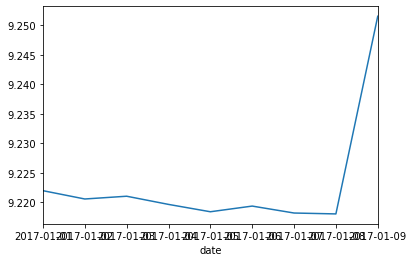

In [122]:
df_botptMean['diff'].plot()
# plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

In [ ]:
df_botptMean['daily_diff'] = df_botptMean['diff'] 

In [ ]:
import pickle


with open('/jovyan/data/botpt/2019bottom_pressure15s_E.pkl, 'rb') as f:
    botpt_E = pickle.load(f)

In [ ]:
botpt_E

In [ ]:
with open('2019bottom_pressure15s_F.pkl', 'rb') as f:
    botpt_F = pickle.load(f)

In [ ]:
botpt_F.iloc[1, 10]

In [ ]:
botpt_F[1, 10]